<a href="https://colab.research.google.com/github/SweetJohnny/AdventofCode/blob/main/OCR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/tesseract-ocr/tesseract
#https://chatgpt.com/c/6738d1ad-947c-800a-b902-e4fea405b5ed

##Install dependecies

In [ ]:
!sudo apt install tesseract-ocr -q
!pip install pytesseract opencv-python-headless matplotlib -q

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


##Image import

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


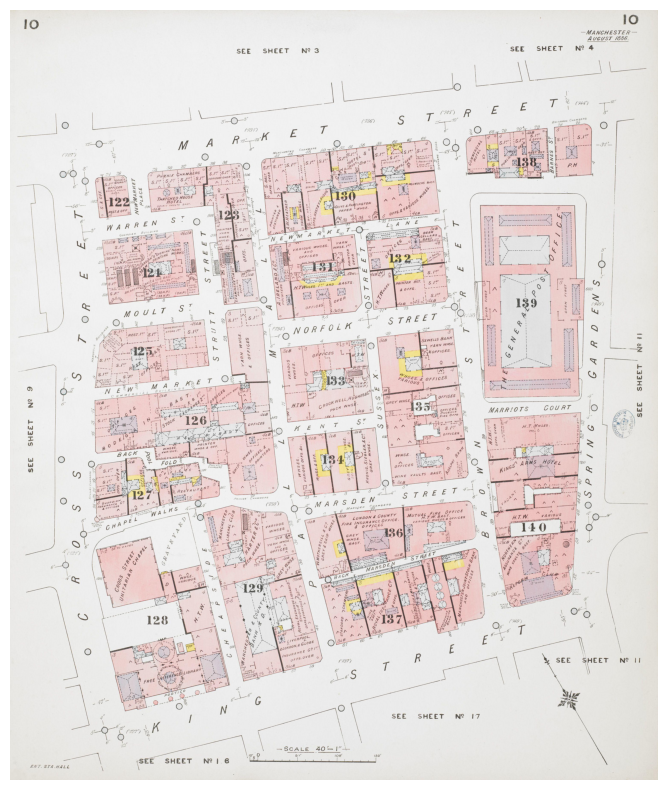

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive')
image_path = "./drive/MyDrive/Colab Notebooks/Projet/MAPS/image_3.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

##Tesseract

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
import numpy as np

custom_config = r'--oem 3 --psm 6 --dpi 600'  # Default configuration

# Detect characters using Tesseract (image_to_boxes returns string output)
ocr_result_init = pytesseract.image_to_boxes(image,config=custom_config)


In [ ]:
filtered_lines = []
for line in ocr_result.splitlines():
    if line:  # Check if the line is not empty
        char = line.split()[0]  # Get the first element (character)
        if char.isalnum() and char.lower() not in ('i'):  # Filter out "i" and "I"
          filtered_lines.append(line)

filtered_ocr_result = '\n'.join(filtered_lines)
#removing i/I as it removes discontinued lines
ocr_result=filtered_ocr_result

#Inpainting

In [ ]:
# Create a blank mask for inpainting
mask = np.zeros(image.shape[:2], dtype=np.uint8)
## Preprocess the image to improve character contours
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Draw contours for each character on the mask
h, w = image.shape[:2]  # Get image dimensions
for box in ocr_result.splitlines():
    b = box.split()
    if len(b) == 6:  # Ensure proper formatting
        char, x1, y1, x2, y2, _ = b
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        # Convert Tesseract coordinates to OpenCV coordinates
        y1, y2 = h - y1, h - y2

        # Extract the specific character area from the binary image
        char_region = binary[y2:y1, x1:x2]

        # Detect contours for the character
        contours, _ = cv2.findContours(char_region, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            # Shift contours to match the original image coordinates
            contour += [x1, y2]
            cv2.drawContours(mask, [contour], -1, 255, thickness=-1)

# Dilate the mask to exclude masked pixels from interpolation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Adjust kernel size as needed
dilated_mask = cv2.dilate(mask, kernel, iterations=1)
# Inpaint using the dilated mask
inpainted_image = cv2.inpaint(image, dilated_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)


(-0.5, 3029.5, 3601.5, -0.5)

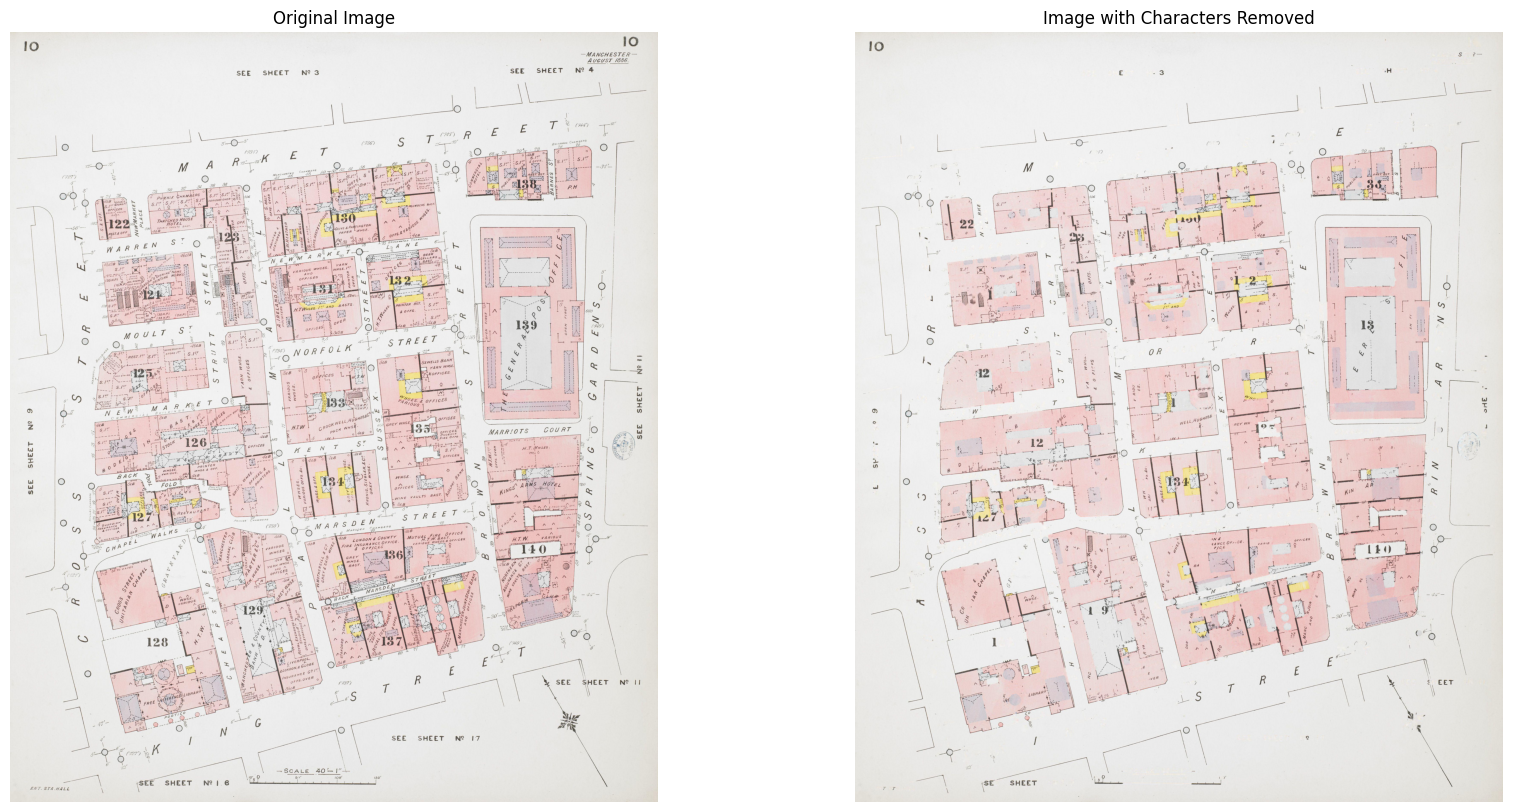

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
inpainted_image = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)
#Display
plt.figure(figsize=(20, 10))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
# Inpainted image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Characters Removed")
plt.axis("off")

In [ ]:
# Save the inpainted image
output_inpainted_path = "./drive/MyDrive/Colab Notebooks/Projet/MAPS/image_3_no_char.png"
cv2.imwrite(output_inpainted_path, inpainted_image)
print(f"Inpainted image saved as {output_inpainted_path}")

# Save the mask
output_mask_path = "./drive/MyDrive/Colab Notebooks/Projet/MASKS/image_3_no_char_mask.png"
cv2.imwrite(output_mask_path, mask)
print(f"Mask saved as {output_mask_path}")


import json
#save the model output
output_json_path = "./drive/MyDrive/Colab Notebooks/Projet/OUTPUT/image_3_no_char_mask.json"
with open(output_json_path, 'w') as json_file:
    json.dump(ocr_result, json_file)
print(f"OCR output saved as {output_json_path}")

Inpainted image saved as ./drive/MyDrive/Colab Notebooks/Projet/MAPS/image_3_no_char.png
Mask saved as ./drive/MyDrive/Colab Notebooks/Projet/MASKS/image_3_no_char_mask.png
OCR output saved as ./drive/MyDrive/Colab Notebooks/Projet/OUTPUT/image_3_no_char_mask.json
